#Análise de Agrupamento (Clustering)
**Nome:** George Sanders Carvalho Araújo

**URL do dataset:** https://www.kaggle.com/pavan9065/top-100-most-streamed-songs-on-spotify

**Pergunta: É possível encontrar grupos naturais analisando as 100 músicas mais ouvidas do Spotify?**

Trata-se de um problema de aprendizagem não-supervisionada, pois não utiliza uma coluna com resultados conhecidos para encontrar os grupos(clusters). Para essa tarefa, foi utilizado o algoritmo KModes, é capaz de trabalhar com atributos numéricos e categóricos. Apesar de muito confiável, o KMeans utiliza distâncias matemáticas para calcular os agrupamentos, o que não será possível no exemplo a seguir.

##Preparação

In [ ]:
!pip install kmodes

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%matplotlib inline

##Dataset

In [ ]:
# Autenticar usuário
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1VmCcY6uING0P1PbMGFM8JgOJREv8XBKl'})
downloaded.GetContentFile('spotify.csv')
df_spotify = pd.read_csv('spotify.csv')

In [ ]:
df_spotify.head()

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [ ]:
#Substitui espaços e pontos por underscore
df_spotify.columns = df_spotify.columns.str.replace('.', '_')
df_spotify.columns = df_spotify.columns.str.replace(' ', '_')

In [ ]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             100 non-null    object
 1   artist            100 non-null    object
 2   top_genre         100 non-null    object
 3   year              100 non-null    int64 
 4   beats_per_minute  100 non-null    int64 
 5   energy            100 non-null    int64 
 6   danceability      100 non-null    int64 
 7   loudness_dB       100 non-null    int64 
 8   liveness          100 non-null    int64 
 9   valance           100 non-null    int64 
 10  length            100 non-null    int64 
 11  acousticness      100 non-null    int64 
 12  speechiness       100 non-null    int64 
 13  popularity        100 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 11.1+ KB


In [ ]:
df_spotify.describe()

,year,beats_per_minute,energy,danceability,loudness_dB,liveness,valance,length,acousticness,speechiness,popularity
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,2015.960000,116.970000,62.680000,66.96000,-6.100000,16.860000,49.970000,214.530000,24.95000,9.930000,79.670000
std,5.327497,27.470629,16.491737,13.60401,1.987334,12.972403,21.737857,35.934974,26.27876,9.424077,5.905065
min,1975.000000,71.000000,11.000000,35.00000,-14.000000,3.000000,6.000000,119.000000,0.00000,2.000000,53.000000
25%,2015.000000,95.000000,52.000000,59.00000,-7.000000,10.000000,33.750000,190.500000,4.00000,4.000000,79.000000
50%,2017.000000,115.000000,64.500000,69.00000,-6.000000,12.000000,48.000000,210.000000,13.00000,6.000000,81.000000
75%,2018.000000,135.250000,76.000000,77.00000,-5.000000,17.250000,66.000000,234.250000,41.50000,11.000000,83.000000
max,2021.000000,186.000000,92.000000,91.00000,-3.000000,79.000000,93.000000,354.000000,98.00000,46.000000,91.000000


In [ ]:
df_spotify.isnull().sum()

title               0
artist              0
top_genre           0
year                0
beats_per_minute    0
energy              0
danceability        0
loudness_dB         0
liveness            0
valance             0
length              0
acousticness        0
speechiness         0
popularity          0
dtype: int64

In [ ]:
df_spotify.drop_duplicates(inplace=True)

##Análise de agrupamento(KModes)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1240.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 1189.0
Run 1, iteration: 2/100, moves: 4, cost: 1186.0
Run 1, iteration: 3/100, moves: 2, cost: 1186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16

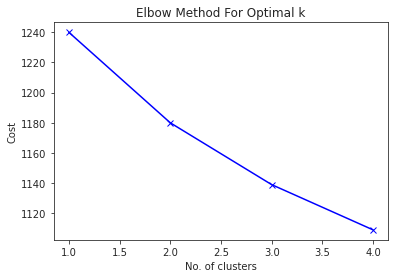

In [ ]:
# Utiliza o método Elbow Curve para encontrar o K ótimo
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_spotify)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Utilizando o método Elbow, é possível observar uma dobra(bend) em k=2 e k=3. Porém, como em k=3 o custo é menor, este será o nº de clusters escolhidos.

In [ ]:
# Construindo o modelo com 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_spotify)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18, cost: 1148.0
Run 1, iteration: 2/100, moves: 7, cost: 1147.0
Run 1, iteration: 3/100, moves: 1, cost: 1147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 21, cost: 1155.0
Run 2, iteration: 2/100, moves: 5, cost: 1152.0
Run 2, iteration: 3/100, moves: 1, cost: 1152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11, cost: 1157.0
Run 3, iteration: 2/100, moves: 0, cost: 1157.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 19, cost: 1147.0
Run 4, iteration: 2/100, moves: 6, cost: 1147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 24, cost: 1143.0
Run 5, iteration: 2/100, moves: 3, cost: 1143.0
Best run was number

array([0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0,
       2, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0], dtype=uint16)

In [ ]:
# Imprimindo os Centroides dos Clusters
print(kmode.cluster_centroids_)

[['All of Me' 'Post Malone' 'dance pop' '2018' '136' '73' '78' '-5' '9'
  '45' '230' '1' '4' '80']
 ['7 Years' 'The Chainsmokers' 'dance pop' '2016' '90' '56' '53' '-6'
  '10' '43' '177' '0' '5' '84']
 ["Can't Feel My Face" 'Justin Bieber' 'canadian pop' '2015' '100' '45'
  '73' '-6' '11' '75' '206' '3' '3' '81']]


In [ ]:
#Inserindo a coluna "cluster" com as predições
df_spotify.insert(0, "cluster", clusters, True)
df_spotify

,cluster,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness_dB,liveness,valance,length,acousticness,speechiness,popularity
0,0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,0,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,2,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,2,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66
96,2,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66
97,0,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66
98,0,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56


In [ ]:
df_spotify[df_spotify['cluster']== 0].head() #Cluster 1

,cluster,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness_dB,liveness,valance,length,acousticness,speechiness,popularity
0,0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
2,0,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
5,0,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,86
6,0,lovely (with Khalid),Billie Eilish,electropop,2018,115,30,35,-10,10,12,200,93,3,86
7,0,Circles,Post Malone,dfw rap,2019,120,76,70,-3,9,55,215,19,4,86


In [ ]:
df_spotify[df_spotify['cluster']==1].head() #Cluster 2

,cluster,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness_dB,liveness,valance,length,acousticness,speechiness,popularity
1,1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
10,1,Closer,The Chainsmokers,dance pop,2016,95,52,75,-6,11,66,245,41,3,84
11,1,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,84
12,1,Say You Won't Let Go,James Arthur,pop,2016,85,56,36,-7,9,49,211,70,6,84
16,1,Jocelyn Flores,XXXTENTACION,emo rap,2017,134,39,87,-9,30,44,119,47,24,84


In [ ]:
df_spotify[df_spotify['cluster']==2].head() #Cluster 3

,cluster,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness_dB,liveness,valance,length,acousticness,speechiness,popularity
3,2,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,2,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86
24,2,Stressed Out,Twenty One Pilots,modern rock,2015,170,64,73,-6,6,65,202,5,14,83
29,2,Thinking out Loud,Ed Sheeran,pop,2014,79,45,78,-6,18,59,282,47,3,82
31,2,Love Yourself,Justin Bieber,canadian pop,2015,100,38,61,-10,28,52,234,84,44,82
